# Transfer learning
Requirements:

<a href="#requirement1">1.</a> Prepare dataset

<a href="#requirement2">2.</a> Train VGG-16 and ResNet-50 from scratch

<a href="#requirement4">4.</a> Load VGG-16 and ResNet-50 pre-trained on the ImageNet dataset

<a name = "requirement1"> Requirement 1</a> Prepare 4 different experimental settings using the CIFAR-100 dataset.

In order to simplfy the construction of dataset, I defined two functions: 
*split_train_valid* & *define_dataloader*.

split_train_valid : split the corresponding percentage dataset

define_dataloader : define dataloader




0it [00:00, ?it/s]

169009152it [00:06, 26534865.05it/s]                               


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
50000
length of dataset 10000
50000
length of dataset 20000
50000
length of dataset 30000
50000
length of dataset 50000


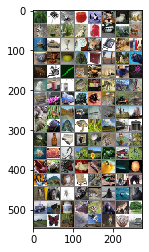

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch import nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# split train,valid dataset
def split_train_valid(percentage):
  # split coresponding percentage data
  print(len(trainset))
  num_percetage_trainset = len(trainset)
  index_list_percentage = list(range(num_percetage_trainset))
  split_percentage = int(percentage*num_percetage_trainset) 
  dataset = index_list_percentage[:split_percentage]
  print(f'length of dataset {(len(dataset))}')

  # split train,valid dataset
  num_train = len(dataset)
  index_list = list(range(num_train))
  split = int(1/4*num_train)

  train_idx, valid_idx = index_list[:split], index_list[split:]

  valid_set = SubsetRandomSampler(valid_idx)
  train_set = SubsetRandomSampler(train_idx)

  return dataset, valid_set, train_set


# define dataloader
def define_dataloader(train_dataset):
  trainloader = torch.utils.data.DataLoader(trainset, batch_size= 128, num_workers=2, shuffle=True)
  validloader = torch.utils.data.DataLoader(trainset, batch_size= 128, num_workers=2, shuffle=False)
  return trainloader, validloader


#Take 20%, 40%, 60%, and 100% of CIFAR-100 train images, and construct dataloader
train_dataset20, validset20, trainset20 = split_train_valid(0.2)
trainloader20, validloader20 = define_dataloader(train_dataset20)
print(trainloader20)

train_dataset40, validset40, trainset40 = split_train_valid(0.4)
#print(train_dataset40)
trainloader40, validloader40 = define_dataloader(train_dataset40)

train_dataset60, validset60, trainset60 = split_train_valid(0.6)
#print(train_dataset60)
trainloader60, validloader60 = define_dataloader(train_dataset60)

train_dataset100, validset100, trainset100 = split_train_valid(1)
#print(train_dataset100)
trainloader100, validloader100 = define_dataloader(train_dataset100)

testloader = torch.utils.data.DataLoader(testset, batch_size= 128, num_workers=2) 

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader20)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [4]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

True


<a name = "requirement2"> Requirement 2 </a>For each setting, train VGG-16 and ResNet-50 from scratch and evaluate them.

<a href = "#1">1. </a>loading the neural model and define optimizer

<a href = "#2">2. </a>define training function

<a href = "#3">3. </a>define validation function

<a href = "#4">4. </a>combine the training and validation functions to get the loss and accuracy

- train for VGG16 model 
- train for ResNet model 


<a href = "#5">5. </a>test the model

<a name  = "1">1. </a>loading the neural model and define optimizer 

In [5]:
#import models from torchvision
from torchvision import models
#build the pretrained model (vgg16 in this case)
modelVGG16 = models.vgg16()
modelResNet = models.resnet50()
modelVGG16.cuda()
modelResNet.cuda()

print(modelVGG16)
print(modelResNet)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
#import optimizer
from torch import optim
#define criteria and optimizer
criteria = nn.CrossEntropyLoss()
optimizerVGG16 = optim.SGD(modelVGG16.parameters(), lr = 0.005, weight_decay= 1e-6, momentum = 0.5)
optimizerResNet = optim.SGD(modelResNet.parameters(), lr = 0.005, weight_decay= 1e-6, momentum = 0.5)


In [0]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader20):

        inputs_c = inputs.cuda()
        labels_c = labels.cuda()

        # forward + backward + optimize
        outputs = modelVGG16(inputs_c)
        loss = criteria(outputs, labels_c)

        # zero the parameter gradients
        optimizerVGG16.zero_grad()
        loss.backward()
        optimizerVGG16.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

<a name = "2">2. </a>define training function

In [0]:
#define training function
def train (model, trainloader, criterion, optimizer):
    model.train()
    current_loss = 0
    current_correct = 0
    for train, y_train in iter(trainloader):
        train = train.cuda()
        y_train = y_train.cuda()
        optimizer.zero_grad()
        output = model.forward(train)
        _, preds = torch.max(output,1)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()*train.size(0)
        current_correct += torch.sum(preds == y_train.data)
    epoch_loss = current_loss / len(trainloader.dataset)
    epoch_acc = current_correct.double() / len(trainloader.dataset)
        
    return epoch_loss, epoch_acc

<a name = "3">3. </a>define validation function

In [0]:
#define validation function
def validation (model, validloader, criterion):
    model.eval()
    valid_loss = 0
    valid_correct = 0
    for valid, y_valid in iter(validloader):
        valid = valid.cuda()
        y_valid = y_valid.cuda()
        output = model.forward(valid.cuda())
        valid_loss += criterion(output, y_valid).item()*valid.size(0)
        equal = (output.max(dim=1)[1] == y_valid.data)
        valid_correct += torch.sum(equal)#type(torch.FloatTensor)
    
    epoch_loss = valid_loss / len(validloader.dataset)
    epoch_acc = valid_correct.double() / len(validloader.dataset)
    
    return epoch_loss, epoch_acc

<a name = "4">4. </a> train each set in model VGG16 & ResNet50

* VGG16

| data  | accuracy | 
|  ----  | ----  | 
| 20% | 单元格 |
| 40%  | 单元格 |
| 60% | 单元格 |
| 100%  | 单元格 |

* ResNet50

| data  | accuracy | 
|  ----  | ----  | 
| 20% | 单元格 |
| 40%  | 单元格 |
| 60% | 单元格 |
| 100%  | 单元格 |

* train for VGG16 model 20% train data

In [0]:
def combine_train_validate(model, trainloader, validloader, optimizer):
  #Initialize training params  
  #train and validate
  epochs = 10  
  epoch = 0
  train_loss, val_loss = [],[]    
  for e in range(epochs):
      epoch +=1
      print(epoch)
      with torch.set_grad_enabled(True):
          epoch_train_loss, epoch_train_acc = train(model, trainloader, criteria, optimizer)
          train_loss.append(epoch_train_loss)
      print("Epoch: {} Train Loss : {:.4f}  Train Accuracy: {:.4f}".format(epoch,epoch_train_loss,epoch_train_acc))

      with torch.no_grad():
          epoch_val_loss, epoch_val_acc = validation(model, validloader, criteria)
          val_loss.append(epoch_val_loss)
      print("Epoch: {} Validation Loss : {:.4f}  Validation Accuracy {:.4f}".format(epoch,epoch_val_loss,epoch_val_acc))
  return train_loss,val_loss

In [22]:
combine_train_validate(modelVGG16, trainloader100, validloader100, optimizerVGG16)

1
Epoch: 1 Train Loss : 4.7124  Train Accuracy: 0.0095
Epoch: 1 Validation Loss : 4.6448  Validation Accuracy 0.0100
2
Epoch: 2 Train Loss : 4.6852  Train Accuracy: 0.0103
Epoch: 2 Validation Loss : 4.6337  Validation Accuracy 0.0100
3
Epoch: 3 Train Loss : 4.6700  Train Accuracy: 0.0104
Epoch: 3 Validation Loss : 4.6242  Validation Accuracy 0.0100
4
Epoch: 4 Train Loss : 4.6206  Train Accuracy: 0.0130
Epoch: 4 Validation Loss : 4.4604  Validation Accuracy 0.0181
5
Epoch: 5 Train Loss : 4.4184  Train Accuracy: 0.0251
Epoch: 5 Validation Loss : 4.2480  Validation Accuracy 0.0418
6
Epoch: 6 Train Loss : 4.2196  Train Accuracy: 0.0408
Epoch: 6 Validation Loss : 4.0643  Validation Accuracy 0.0554
7
Epoch: 7 Train Loss : 4.0720  Train Accuracy: 0.0582
Epoch: 7 Validation Loss : 4.0120  Validation Accuracy 0.0700
8
Epoch: 8 Train Loss : 3.9845  Train Accuracy: 0.0717
Epoch: 8 Validation Loss : 3.9505  Validation Accuracy 0.0797
9
Epoch: 9 Train Loss : 3.9104  Train Accuracy: 0.0816
Epoch: 9 

1
Epoch: 1 Train Loss : 5.2436  Train Accuracy: 0.0089
Epoch: 1 Validation Loss : 4.6756  Validation Accuracy 0.0100
2
Epoch: 2 Train Loss : 4.7193  Train Accuracy: 0.0093
Epoch: 2 Validation Loss : 4.6475  Validation Accuracy 0.0103
3
Epoch: 3 Train Loss : 4.6847  Train Accuracy: 0.0102
Epoch: 3 Validation Loss : 4.6330  Validation Accuracy 0.0100
4
Epoch: 4 Train Loss : 4.6585  Train Accuracy: 0.0119
Epoch: 4 Validation Loss : 4.5671  Validation Accuracy 0.0161
5
Epoch: 5 Train Loss : 4.4552  Train Accuracy: 0.0244
Epoch: 5 Validation Loss : 4.2662  Validation Accuracy 0.0405
6
Epoch: 6 Train Loss : 4.2575  Train Accuracy: 0.0394
Epoch: 6 Validation Loss : 4.1141  Validation Accuracy 0.0535
7
Epoch: 7 Train Loss : 4.1211  Train Accuracy: 0.0522
Epoch: 7 Validation Loss : 3.9749  Validation Accuracy 0.0710
8
Epoch: 8 Train Loss : 3.9908  Train Accuracy: 0.0729
Epoch: 8 Validation Loss : 3.8514  Validation Accuracy 0.0954
9
Epoch: 9 Train Loss : 3.8853  Train Accuracy: 0.0867
Epoch: 9 

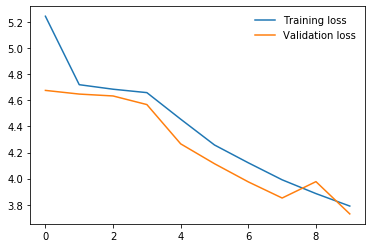

In [10]:
train_loss20, valid_loss20 = combine_train_validate(modelVGG16, trainloader100, validloader100, optimizerVGG16)
import matplotlib.pyplot as plt

plt.plot(train_loss20, label='Training loss')
plt.plot(valid_loss20, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [0]:
def test_network(model, testLoader):
  model.eval()
  total = 0
  correct = 0 
  count = 0
  #iterating for each sample in the test dataset once
  for test, y_test in iter(testLoader):
  #Calculate the class probabilities (softmax) for img
      with torch.no_grad():
          teat = test.cuda()
          y_test = y_test.cuda()
          output = model.forward(test)
          ps = torch.exp(output)
          _, predicted = torch.max(output.data,1)
          total += y_test.size(0)
          correct += (predicted == y_test).sum().item() 
          count += 1
          print("Accuracy of network on test images is ... {:.4f}....count: {}".format(100*correct/total,  count ))

In [0]:
test_network(modelVGG16, testloader)

In [0]:
def train_validate(model, trainloader, validloader, optimizer):
  train_losses, valid_losses = [], []
  train_mean_loss, valid_mean_loss = [], []

  for epoch in range(1, 2):
      # training
      model.train()
      for x, target in trainloader:
          x = x.cuda()
          target = target.cuda()
          optimizer.zero_grad()
          out = model(x)
          loss = criteria(out, target)
          loss.backward()
          optimizer.step()
          train_losses.append(loss.item())
      
      # valuation
      model.eval()
      for data,target in validloader:
        data = data.cuda()
        target = target.cuda()
        out = model(data)
        loss = criterion(out,target)
        valid_losses.append(loss.item())

      train_loss = np.average(train_losses)
      valid_loss = np.average(valid_losses)
      train_mean_loss.append(train_loss)
      valid_mean_loss.append(valid_loss)

      print_msg = (f'epoch: {epoch} ' +
                      f'train_loss: {train_loss:.5f} ' +
                      f'valid_loss: {valid_loss:.5f}')
        
      print(print_msg)
  torch.save(model, 'aerialmodel.pth')
  return train_mean_loss, valid_mean_loss

In [14]:
train_losses, valid_losses = train_validate(modelVGG16, trainloader20, validloader20, optimizerVGG16)

NameError: ignored

In [0]:
def train_steps(trainloader, testloader, model, optimizer): 
  epochs = 1
  steps = 0
  running_loss = 0
  print_every = 10
  train_losses, test_losses = [], []
  for epoch in range(epochs):
      for inputs, labels in trainloader:
          steps += 1
          inputs = inputs.cuda()
          labels = labels.cuda()
          optimizer.zero_grad()
          logps = model.forward(inputs)
          loss = criteria(logps, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          
          if steps % print_every == 0:
              test_loss = 0
              accuracy = 0
              model.eval()
              with torch.no_grad():
                  for inputs, labels in testloader:
                      inputs = inputs.cuda()
                      labels = labels.cuda()
                      logps = model.forward(inputs)
                      batch_loss = criteria(logps, labels)
                      test_loss += batch_loss.item()
                      
                      ps = torch.exp(logps)
                      top_p, top_class = ps.topk(1, dim=1)
                      equals = top_class == labels.view(*top_class.shape)
                      accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
              train_losses.append(running_loss/len(trainloader))
              test_losses.append(test_loss/len(testloader))                    
              print(f"Epoch {epoch+1}/{epochs}.. "
                    f"Train loss: {running_loss/print_every:.3f}.. "
                    f"Test loss: {test_loss/len(testloader):.3f}.. "
                    f"Test accuracy: {accuracy/len(testloader):.3f}")
              running_loss = 0
              model.train()
  torch.save(model, 'aerialmodel.pth')
  return train_losses, test_losses

In [0]:
train_losses, test_losses = train_steps(trainloader20, testloader, modelVGG16, optimizerVGG16)

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

<a name = "requirement4">4.</a>

1. split data and construct dataloader
2. define pre-trained model

In [0]:
import torchvision
trainset = torchvision.datasets.ImageNet(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.ImageNet(root='./data', train=False, download=True, transform=transform)


#Take 20%, 40%, 60%, and 100% of CIFAR-100 train images, and construct dataloader
train_dataset20, validset20, trainset20 = split_train_valid(0.2)
#print(train_dataset20)
trainloader20, validloader20 = define_dataloader(train_dataset20)

train_dataset40, validset40, trainset40 = split_train_valid(0.4)
#print(train_dataset40)
trainloader40, validloader40 = define_dataloader(train_dataset40)

train_dataset60, validset60, trainset60 = split_train_valid(0.6)
#print(train_dataset60)
trainloader60, validloader60 = define_dataloader(train_dataset60)

train_dataset100, validset100, trainset100 = split_train_valid(1)
#print(train_dataset100)
trainloader100, validloader100 = define_dataloader(train_dataset100)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=2) 

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader20)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
#import models from torchvision
from torchvision import models
#build the pretrained model (vgg16 in this case)
modelVGG16 = models.vgg16(pretrained=True)
modelResNet = models.resnet50(pretrained=True)

print(modelVGG16.classifier)
modelVGG16.classifier[6] = nn.Linear(4096,100)

# taining stage - cifiar100

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
modelVGG16 = modelVGG16.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizerVGG16 = optim.SGD(modelVGG16.fc.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


In [0]:
#for each weight in the model, donot do the backward
for param in model.parameters():
    param.requires_grad = False
#in order to contimue learning, so donot fix the fully connected layer parameter
for param in model.fc.parameters():
    param.requires_grad = True

optimizerVGG16 = torch.optim.SGD(filter(lambda p: p.requires_grad, modelVGG16.parameters()), lr=0.1)
optimizerResNet = torch.optim.SGD(filter(lambda p: p.requires_grad, modelResNet.parameters()), lr=0.1)


In [0]:
train_steps(trainloader20, testloader, modelVGG16, optimizerVGG16)